### 手書き数字認識　
#### 　　勾配ブースティング　LGBM   
    
    学習途中の表示
    不正解画像の表示
    
    

In [1]:
#　手書き数字認識　ディープラーニング

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import keras
from keras import models
from keras import layers
from keras.utils import plot_model
from keras.models import model_from_json,load_model
from keras.models import Sequential, load_model

import tensorflow as tf
import lightgbm as lgb

import time
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')

Using TensorFlow backend.


#### 用意したファイルを読み込む

In [2]:
# フラットに展開したデータを読み込む

X_train=np.load('DATA/X_train.npy')
X_test=np.load('DATA/X_test.npy')
y_train=np.load('DATA/y_train.npy')
y_test=np.load('DATA/y_test.npy')

ytrain=np.load('DATA/ytrain.npy')
ytest=np.load('DATA/ytest.npy')


print('X_train.shape  :',X_train.shape)
print('y_train.shape :',y_train.shape)
print('X_test.shape   :',X_test.shape)
print('y_test.shape  :',y_test.shape)

print('ytrain.shape :',ytrain.shape)
print('ytest.shape  :',ytest.shape)

X_train.shape  : (60000, 784)
y_train.shape : (60000, 10)
X_test.shape   : (10000, 784)
y_test.shape  : (10000, 10)
ytrain.shape : (60000,)
ytest.shape  : (10000,)



#### LGBMモデルの作成
  
    
#### コンパイル
    モデルに、学習アルゴリズム、評価関数等を指定しコンパイルする。
    
#### 学習
    以下の値を入れ学習をスタートさせる
        学習データ、正解値データ　　
        エポック数（まとまった学習単位）の数　　エポックの切れ目で色々な事が出来る。
        バッチサイズ（１回の学習に使うサンプル数）
        バッチ数（１エポック中のバッチ数）
        
#### テスト
    学習させたモデルを使い　テストデータを入力し　性能を確認する
 

In [8]:
from sklearn.model_selection import GridSearchCV

model_no  ='C11_'+'LGBM_05031'


params = {'objective' : "multiclass", #  多クラス：'multiclass'
               'num_class': 10,
               'boosting':"gbdt",
               'metric':"categorical_crossentropy",#絶対値誤差関数　mse：二乗誤差
               'boost_from_average':"false",
               'num_threads':4,
               'learning_rate' :0.01 ,#学習率
               'num_leaves' : 16,#木にある分岐の数
               'max_depth':6,  #木構造の深さ
               'tree_learner' : "serial",
               'feature_fraction' : 0.85,#特徴量の使用率　過学習防止 0.85
               'bagging_freq' : 0,
               'bagging_fraction' : 0.85,
               'min_data_in_leaf' : 5,
               'min_sum_hessian_in_leaf' : 10.0,
               'n_estimators' : 20000,
               'n_jobs' : -1,
               'verbosity' : -1  #学習途中の情報の表示か否か
                 }


X_train.shape



(60000, 784)

In [58]:
%%time
# データを指定して学習させる

lgbm_params = {'objective': 'multiclass',
                'num_class': 10,
               #'learning_rate' :0.01 ,#学習率
               #'metric':"categorical_crossentropy"
               'bagging_fraction' : 0.2
              }
    
lgb_train = lgb.Dataset(X_train, ytrain)
lgb_valid = lgb.Dataset(X_test, ytest)

model = lgb.train(lgbm_params, 
                    lgb_train, 
                    valid_sets=lgb_valid ,
                    num_boost_round=1000,
                    early_stopping_rounds=10
                   )



[1]	valid_0's multi_logloss: 1.94621
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's multi_logloss: 1.70937
[3]	valid_0's multi_logloss: 1.5301
[4]	valid_0's multi_logloss: 1.38635
[5]	valid_0's multi_logloss: 1.26438
[6]	valid_0's multi_logloss: 1.16123
[7]	valid_0's multi_logloss: 1.0698
[8]	valid_0's multi_logloss: 0.990358
[9]	valid_0's multi_logloss: 0.920743
[10]	valid_0's multi_logloss: 0.858278
[11]	valid_0's multi_logloss: 0.801902
[12]	valid_0's multi_logloss: 0.750492
[13]	valid_0's multi_logloss: 0.703873
[14]	valid_0's multi_logloss: 0.661302
[15]	valid_0's multi_logloss: 0.62222
[16]	valid_0's multi_logloss: 0.587165
[17]	valid_0's multi_logloss: 0.555264
[18]	valid_0's multi_logloss: 0.526009
[19]	valid_0's multi_logloss: 0.499148
[20]	valid_0's multi_logloss: 0.474574
[21]	valid_0's multi_logloss: 0.451887
[22]	valid_0's multi_logloss: 0.431551
[23]	valid_0's multi_logloss: 0.41249
[24]	valid_0's multi_logloss: 0.39442
[25]	valid_0's multi_lo

[206]	valid_0's multi_logloss: 0.0677313
[207]	valid_0's multi_logloss: 0.0676674
[208]	valid_0's multi_logloss: 0.0676325
[209]	valid_0's multi_logloss: 0.0675233
[210]	valid_0's multi_logloss: 0.0673907
[211]	valid_0's multi_logloss: 0.0672627
[212]	valid_0's multi_logloss: 0.0671146
[213]	valid_0's multi_logloss: 0.0670262
[214]	valid_0's multi_logloss: 0.0669114
[215]	valid_0's multi_logloss: 0.066752
[216]	valid_0's multi_logloss: 0.0667926
[217]	valid_0's multi_logloss: 0.0667129
[218]	valid_0's multi_logloss: 0.0665818
[219]	valid_0's multi_logloss: 0.0664523
[220]	valid_0's multi_logloss: 0.0663208
[221]	valid_0's multi_logloss: 0.0662943
[222]	valid_0's multi_logloss: 0.0662347
[223]	valid_0's multi_logloss: 0.0661057
[224]	valid_0's multi_logloss: 0.0660037
[225]	valid_0's multi_logloss: 0.0659743
[226]	valid_0's multi_logloss: 0.065913
[227]	valid_0's multi_logloss: 0.0658018
[228]	valid_0's multi_logloss: 0.0656759
[229]	valid_0's multi_logloss: 0.0656714
[230]	valid_0's mu

In [55]:
#　評価結果
y_pred = model.predict(X_test)
y_pred_max = np.argmax(y_pred, axis=1)

accuracy = sum(ytest == y_pred_max) / len(ytest)
print(accuracy)

0.9724


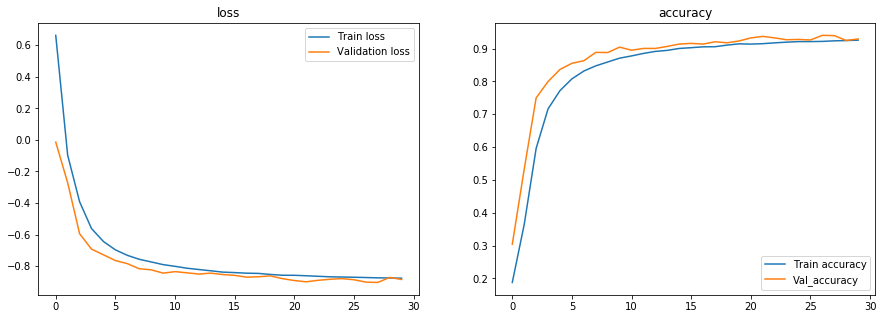

In [24]:
#　訓練時の損失率と正解率をプロット

import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('loss')
ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax[1].set_title('accuracy')
ax[1].plot(history.epoch, history.history["acc"], label="Train accuracy")
ax[1].plot(history.epoch, history.history["val_acc"], label="Val_accuracy")
ax[0].legend()
ax[1].legend()

In [11]:
# モデルの保存

model_name='model/MODEL_C03_NN_0529'

model.save(model_name + '.hdf5')

model.save_weights(model_name + '_weight.hdf5')
#save as JSON
json_string = model.to_json()
open(model_name + '.json','w').write(json_string)

2597

In [ ]:
### 学習済みモデルの読み込み
model_name='model/MODEL_C03_NN_0529'

model2=model_from_json(open(model_name + '.json','r').read())
model2.load_weights(model_name  + '_weight.hdf5')


model2.summary()

#### 不正解データの取り出し
    予測値　予測＋to_categoricaの逆　（onehot⇒0-9の値）
    正解値　
    不正解の　id、予測値　正解値　を　データフレームに
       ３つのデータをarrayに
       assin()メソッドで　データフレームに追加
    
    Xtrain,ytrain, wosiyou を使用
    

In [12]:
# 不正解データを取り出し　データフレームに

y_test_pred=model.predict(X_test)     #　モデルで予測
ytest_pred=np.argsort(-y_test_pred, axis = 1)[:,:1] #　onehotデータを数値順に並べ替え　そのidを返す
ytest_pred=ytest_pred.reshape(-1)

incorrect_id=pd.DataFrame(index=[ ],columns=['inc_id','correct_label','pred_label'])  #　結果を入れるDF

j=0
for i in range(len(ytest)):
    if ytest_pred[i]!=ytest[i]:
        j=j+1
        d=pd.Series([i,ytest[i],ytest_pred[i]],incorrect_id.columns,name=j)
        incorrect_id=incorrect_id.append(d)

print('incorrect_id.shape',incorrect_id.shape)
incorrect_id.head(3)
#incorrect_id.tail(3)

incorrect_id.shape (378, 3)


,inc_id,correct_label,pred_label
1,18,3,8
2,92,9,4
3,97,7,8


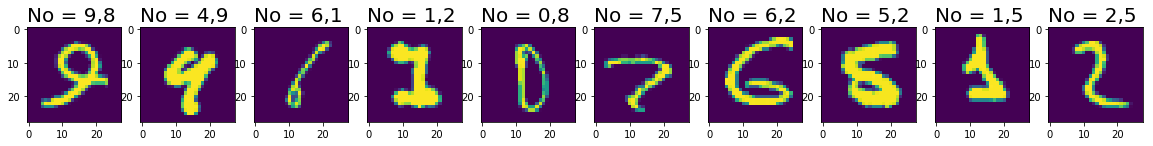

In [13]:
#　不正解データの表示
no=100

fig, ax = plt.subplots(1,10,figsize=(20,5))

for i in range(10):
    image_no=incorrect_id.iloc[i+no][0]
    c=incorrect_id.iloc[i+no][1]
    p=incorrect_id.iloc[i+no][2]
    
    ax[i].imshow(Xtest[image_no] )
    ax[i].set_title('No = {},{} '. format(c,p),fontsize=20)